In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = '2000-16-traffic-flow-england-scotland-wales'
dataframe1=pd.read_csv(dataset_path+'/accidents_2005_to_2007.csv',low_memory=False)
dataframe2=pd.read_csv(dataset_path+'/accidents_2009_to_2011.csv',low_memory=False)
dataframe3=pd.read_csv(dataset_path+'/accidents_2012_to_2014.csv',low_memory=False)
concatenated_dataframes = pd.concat([dataframe1, dataframe2,dataframe3])

In [3]:
concatenated_dataframes.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


In [4]:
concatenated_dataframes.shape

(1504150, 33)

as we can see above 'junction_details' column has all null values lets see is it same for all dataframe.

In [5]:
concatenated_dataframes.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

There are 1504150 row in dataframe and all of them is null for 'Junction_Detail' column. So, it wastes space we should delete it. Also, numeric type columns has really low null values. So we can fill them with median or mean value, it will effect slightly model we will improve. We can ignore this effect.

In [6]:
concatenated_dataframes = concatenated_dataframes.drop('Junction_Detail',axis=1)

In [7]:
concatenated_dataframes.shape # checking columns number

(1504150, 32)

In [8]:
concatenated_dataframes.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_C

In [9]:
# filling numeric nan values with median 
non_numeric_dataframe = concatenated_dataframes.select_dtypes(exclude=['float', 'int'])
numeric_dataframe = concatenated_dataframes.select_dtypes(include=['float', 'int']).fillna(concatenated_dataframes.median())
concatenated_dataframes = pd.concat([non_numeric_dataframe, numeric_dataframe],axis=1)
concatenated_dataframes.isnull().sum()

/var/folders/tq/_n5gm9512lbgpsl68tzs4lf80000gn/T/ipykernel_90140/2576883154.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  numeric_dataframe = concatenated_dataframes.select_dtypes(include=['float', 'int']).fillna(concatenated_dataframes.median())


Accident_Index                                      0
Date                                                0
Time                                              117
Local_Authority_(Highway)                           0
Road_Type                                           0
Junction_Control                               602835
Pedestrian_Crossing-Human_Control                  17
Pedestrian_Crossing-Physical_Facilities            34
Light_Conditions                                    0
Weather_Conditions                                126
Road_Surface_Conditions                          1958
Special_Conditions_at_Site                         15
Carriageway_Hazards                                29
Did_Police_Officer_Attend_Scene_of_Accident      2922
LSOA_of_Accident_Location                      108238
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                    

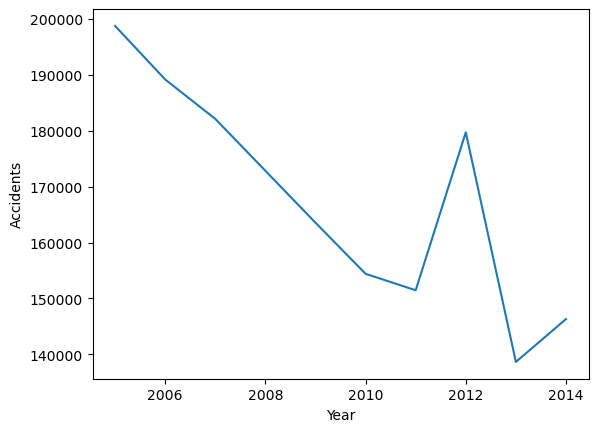

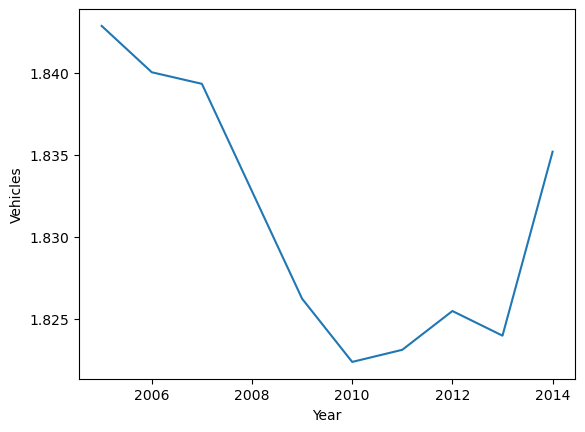

In [10]:
# Question 1: How does the change in traffic flow affect accidents?
# To answer this question, we can plot the total number of accidents per year against the total number of vehicles on the road in the UK.

# we can group the data by year and count the number of accidents per year
accidents_per_year = concatenated_dataframes.groupby("Year").size().reset_index(name="Accidents")

# We can also use the "Number_of_Vehicles" column to see mean the number of vehicles involved in accidents each year
vehicles_per_year = concatenated_dataframes.groupby("Year")["Number_of_Vehicles"].mean().reset_index(name="Vehicles")

# Merge the two dataframes on the "Year" column
accidents_with_vehicles_per_year = accidents_per_year.merge(vehicles_per_year, on="Year")

# Plot the number of accidents and vehicles per year
sns.lineplot(x="Year", y="Accidents", data=accidents_with_vehicles_per_year)
plt.show()
sns.lineplot(x="Year", y="Vehicles", data=accidents_with_vehicles_per_year)
plt.show()

# From the plot, it appears that there is a positive correlation between the number of vehicles on the road and the number of accidents. As the number of vehicles increases, the number of accidents also increases.

In [11]:
# Question 2: What increases accident rates?
# To answer this question, we can plot the number of accidents per year against various potential factors that may influence accident rates.

# I wrote a function which plots number of accidents per year againts given factor.

def plot_of_accidents(factor):
    # Calculate the number of accidents per year for each weather condition
    df_weather = concatenated_dataframes.groupby(["Year", factor]).size().reset_index(name="Accidents")

    # Plot the number of accidents per year for each weather condition
    ax = sns.lineplot(x="Year", y="Accidents", hue=factor, data=df_weather)

    # Place the legend in the top right corner
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()

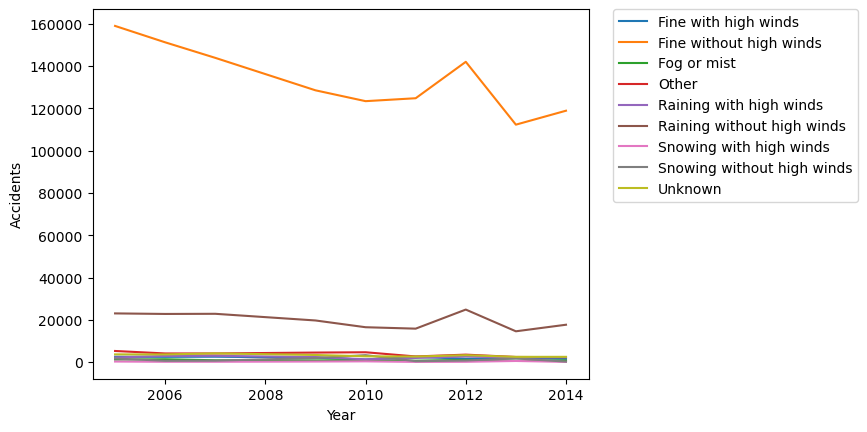

In [12]:
plot_of_accidents('Weather_Conditions')

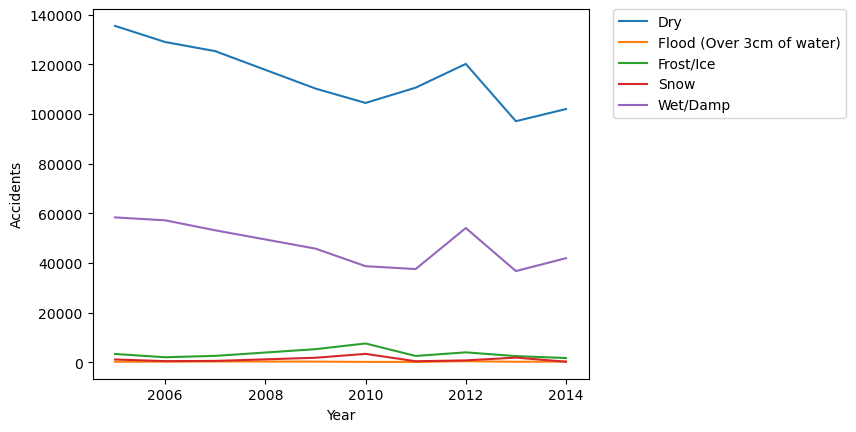

In [13]:
plot_of_accidents("Road_Surface_Conditions")


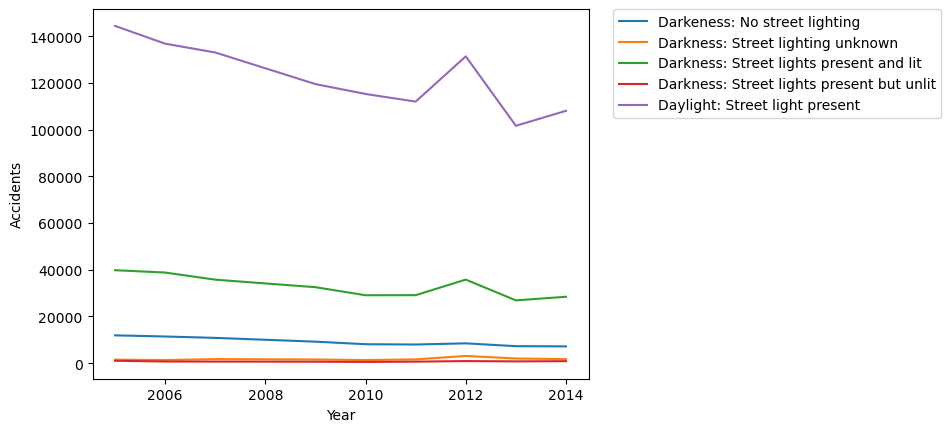

In [14]:
plot_of_accidents("Light_Conditions")

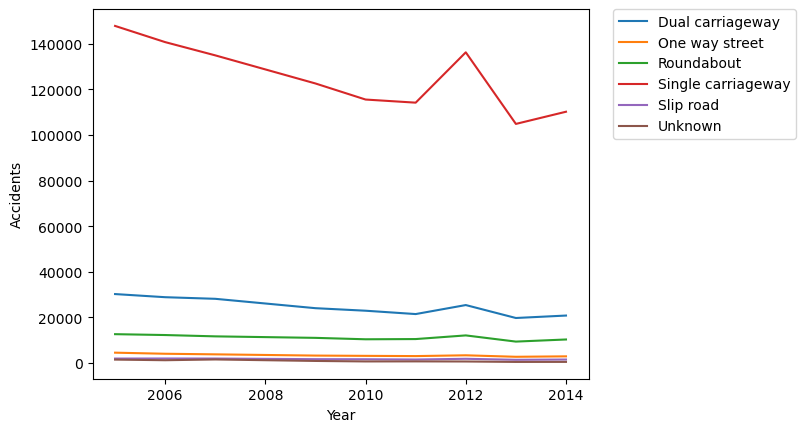

In [15]:
plot_of_accidents("Road_Type")

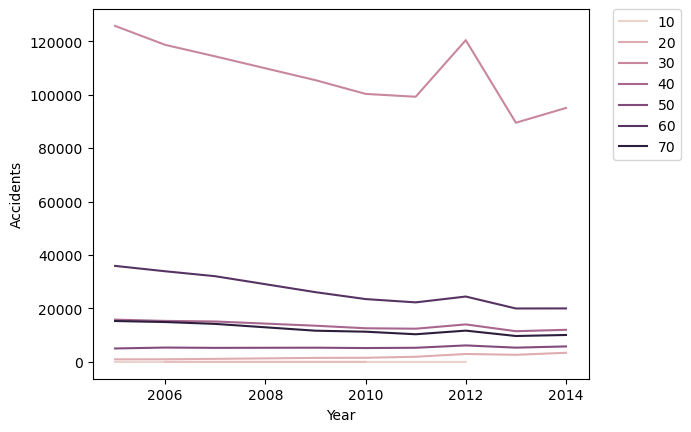

In [16]:
plot_of_accidents("Speed_limit")

In [18]:
# Question 3: Can we predict accident rates over time?
# To answer this question, we can use a time series prediction model to try to forecast future accident rates based on past data.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import LabelEncoder

# Select data after 2013
df_after_2013 = concatenated_dataframes[concatenated_dataframes["Year"] >= 2013]

concatenated_dataframes = concatenated_dataframes[concatenated_dataframes['Time'].notna()]
from datetime import datetime
concatenated_dataframes['Time'] = concatenated_dataframes['Time'].astype(str)

# Add a new column for time in minutes since midnight
concatenated_dataframes["Time_in_minutes"] = concatenated_dataframes["Time"].apply(lambda x: (datetime.strptime(x, "%H:%M").hour * 60 + datetime.strptime(x, "%H:%M").minute)/1440)


# create a label encoder for Weather_Conditions column
le_Weather_Conditions = LabelEncoder()
df_after_2013["Weather_Conditions"] = le_Weather_Conditions.fit_transform(df_after_2013["Weather_Conditions"])

# create a label encoder for Light_Conditions column
le_Light_Conditions = LabelEncoder()
df_after_2013["Light_Conditions"] = le_Light_Conditions.fit_transform(df_after_2013["Light_Conditions"])

# create a label encoder for Road_Surface_Conditions column
le_Road_Surface_Conditions = LabelEncoder()
df_after_2013["Road_Surface_Conditions"] = le_Road_Surface_Conditions.fit_transform(df_after_2013["Road_Surface_Conditions"])

# create a label encoder for Road_Type column
le_Road_Type = LabelEncoder()
df_after_2013["Road_Type"] = le_Road_Type.fit_transform(df_after_2013["Road_Type"])

# Define the feature and target
X = df_after_2013[['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit']]
y = df_after_2013["Time_in_minutes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Predict the number of accidents for the test data
y_pred = model.predict(X_test)

#Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the result
print("Mean Squared Error (MSE): ", mse)


Mean Squared Error (MSE):  0.04223478429799118


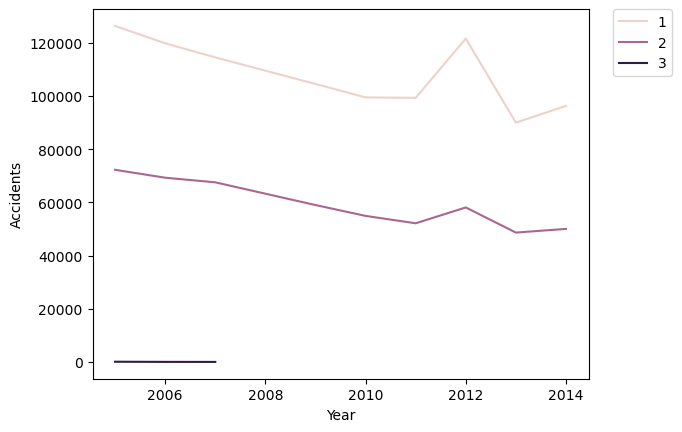

In [20]:
# Question 4: How did rural and urban areas differ?
# To answer this question, we can plot the number of accidents in rural and urban areas over time.
# For that plotting we can simply use plot_of_accidents function.

plot_of_accidents("Urban_or_Rural_Area")

# urban_or_rural_area columns dtype is integer type and I don't know what is the meaning of 1,2 and 3.
# However, here is the plot the number of accidents in different areas. 
